# Project : Forest Fires
   ### Multiple Linear Regression

# Group 3
### Member                                                  
#### 6131501027  Nuntipron Chaithep
#### 6131501045 Phumin Pudtabthong 
#### 6131501072 Nathakarn Naruchaisirirat
#### 6131501074 Supphasek Nateprapai

#### Background
Due to the current forest fire problem, we have been looking for a dataset to study how much attributes are contributing to forest fires so that we can use the data we have studied to be useful for the current forest fire situation by using the data that we obtained to predict the potential area of forest fire and it will enable us to prepared with the upcoming forest fire area.


### Attribute Information :
For more information, read [Cortez and Morais, 2007].
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20
6. DMC - Duff Moisture Code index from the FWI system: 1.1 to 291.3
7. DC - Drought Code index from the FWI system: 7.9 to 860.6
8. ISI - Initial Spread index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4

### Class Target
area - the burned area of the forest (in ha): 0.00 to 1090.84

Link: http://archive.ics.uci.edu/ml/datasets/Forest+Fires?fbclid=IwAR2mGgHog-Nx0JO2V_DiESuJl9eKN2lHJMDsfzTvbbwfKI8B8fc6ZuWfL6k

### Importing Python packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle
import statsmodels.api as sm

### Reading a dataset

In [2]:
df = pd.read_csv('forestfires.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Basic Data Exploration and Data Pre-processing

In [3]:
# Display how many rows and columns

df.shape

(517, 13)

### Show the column in data

In [4]:
# Display features

df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

### Show the type of data in each column

In [5]:
# Display data types 

df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

### The describe method is used for calculating statistical data like percentile, mean and std of the numerical values of the Series or DataFrame

In [6]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Checking missing values

In [7]:
# Finding missing values for each sample:

df.isnull().sum(axis=1).sum()

0

### Removing duplications

In [8]:
# Count duplicated rows

len(df[df.duplicated()])

4

In [9]:
# Remove the duplicates

df.drop_duplicates(inplace=True)

In [10]:
# Reset dataframe index 

df.reset_index(drop=True, inplace=True)
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
509,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
510,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
511,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Handling outliers

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


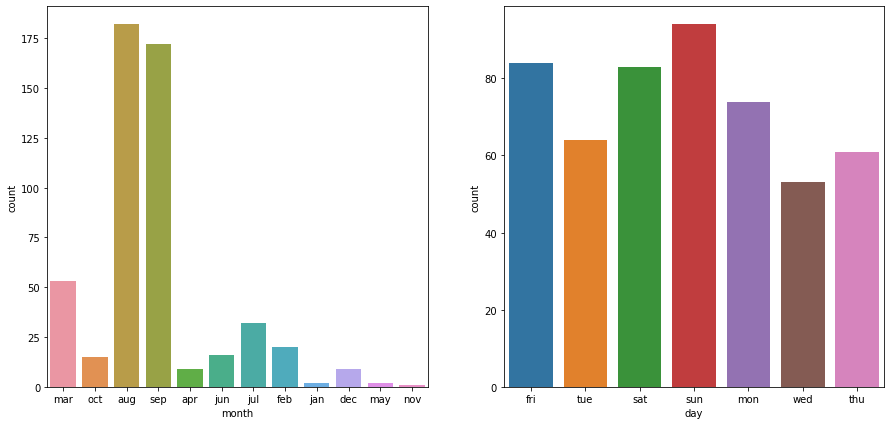

In [11]:
# Finding outliers for categorical features

cat_data = df.select_dtypes(include=['object']) 
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
for i, subplot in zip(cat_data.columns, ax.flatten()):
    sns.countplot(cat_data[i], ax=subplot)

In [12]:
# Drop Jan, May, Nov because these months have less data.

df.drop(df[df.month=='jan'].index, inplace=True)
df.drop(df[df.month=='may'].index, inplace=True)
df.drop(df[df.month=='nov'].index, inplace=True)

### Changing features of month and day from object to int

In [13]:
#replacing with number

df.month.replace(('feb','mar','apr','jun','jul','aug','sep','oct','dec'),(2,3,4,6,7,8,9,10,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [14]:
df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [15]:
#changing type to int

df['month'] = df['month'].astype(str).astype(int)
df['day'] = df['day'].astype(str).astype(int)

In [16]:
df.dtypes

X          int64
Y          int64
month      int32
day        int32
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

## Deleting outliers of area

(array([422.,  30.,  19.,   9.,   6.,   4.,   3.,   2.,   2.,   2.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.,   1.,   2.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([   0.    ,   10.9084,   21.8168,   32.7252,   43.6336,   54.542 ,
          65.4504,   76.3588,   87.2672,   98.1756,  109.084 ,  119.9924,
         130.9008,  141.8092,  152.7176,  163.626 ,  174.5344,  185.4428,
         196.3512,  207.2596,  218.168 ,  229.0764,  239.9848,  250.8932,
         261.8016,  27

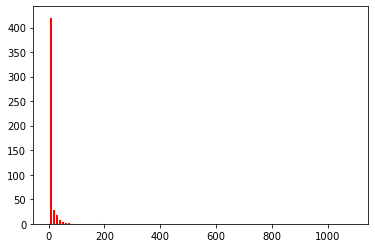

In [17]:
#ploting histogram color of the area

plt.hist(df.area, ec='w', bins=100, color='red')

In [18]:
df_area=df['area']

In [19]:
#Dividing a range to see the distribution of the area

df_area= pd.cut(df['area'], bins=[0,5, 10, 50, 100, 1100], include_lowest=True, 
                                 labels=['0-5', '5-10', '10-50', '50-100', '>100'])
df_area.value_counts()

0-5       359
10-50      69
5-10       56
50-100     13
>100       11
Name: area, dtype: int64

In [20]:
#Delete area >100
df.drop(df[df['area'] > 100].index, inplace = True)

In [21]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,8,6,8,7,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00
508,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
509,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
510,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16


## Saving data that is a cleaned data.

In [22]:
df.to_csv('ML_A.csv')

In [23]:
# Reading a cleaned data

df = pd.read_csv('ML_A.csv')
df

,Unnamed: 0,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,507,8,6,8,7,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00
493,508,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
494,509,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
495,510,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16


## Removing useless data

In [24]:

df = df.drop(columns=['Unnamed: 0'])
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
492,8,6,8,7,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00
493,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
494,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
495,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
496,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


## Correlation Heatmaps

<AxesSubplot:>

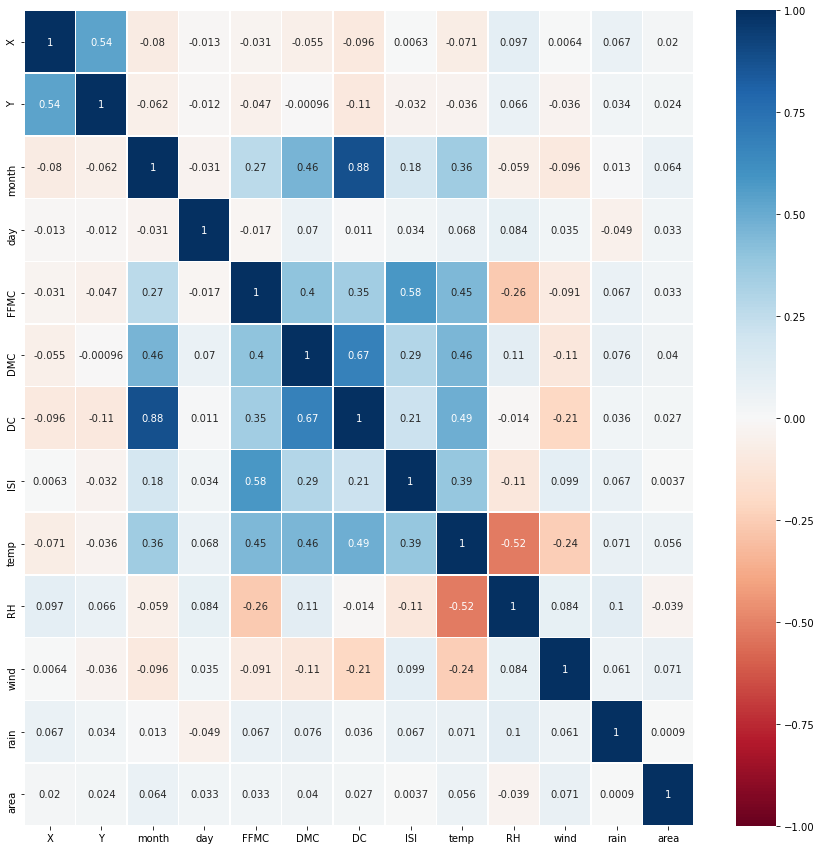

In [25]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, cmap="RdBu",
            vmin=-1, vmax=1, annot=True, linewidths=.5, ax=ax)

## Data Pre-processing 

In [26]:
#Defining Features (X)

X = df.iloc[:,0:12]
X.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [27]:
#Defining Features (Y)

Y = df[['area']]
Y.tail()

,area
492,0.00
493,6.44
494,54.29
495,11.16
496,0.00


## Normalization
Standardize the features uisng the StandardScaler class from scikit-learn's preprocessing module

In [28]:

sc = StandardScaler()
norm_data = sc.fit_transform(X)
X = pd.DataFrame(norm_data, columns=X.columns) 
X.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,1.011529,0.574233,-1.992849,0.363784,-1.018751,-1.332869,-1.854755,-0.875169,-1.847778,0.419825,1.480703,-0.074736
1,1.011529,-0.248227,1.111997,-1.082622,-0.048411,-1.188684,0.477248,-0.525646,-0.156629,-0.698293,-1.730698,-0.074736
2,1.011529,-0.248227,1.111997,0.845920,-0.048411,-1.058604,0.549463,-0.525646,-0.743354,-0.698293,-1.509223,-0.074736
3,1.444171,1.396693,-1.992849,0.363784,0.194175,-1.221596,-1.922914,-0.023208,-1.830522,3.277238,-0.014260,0.588546
4,1.444171,1.396693,-1.992849,1.328055,-0.335102,-0.939495,-1.822705,0.107863,-1.295566,3.401474,-1.232378,-0.074736


## Splitting Train-Test Data

In [29]:
#70:30
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 0, test_size = 0.3)

## Multiple Linear Regression

In [30]:
mse = []
X2 = X_train
LR = LinearRegression()
LR.fit(X2, Y_train)
Y_pred = LR.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
mse.append(metrics.mean_squared_error(Y_test, Y_pred))

Mean Squared Error: 156.96250360696175


## Deploying  the model for forecasting

In [31]:
#Creating the best model with all instances and all features

#define linear regression model object
LR = LinearRegression()
# fit data (all instance and all features) with regression model    
LR.fit(X, Y)

LinearRegression()

## Using the model to forecast target value (Class) for new data

In [32]:
X_new = [[2,2,12,1,0.1,0.1,0.1,0.1,0.1,1,0.1,2.62]]  # (1) define/read new instance
X_new = sc.transform(X_new) # (2) normalize them using the normalization model created previously (sc is StandardScaler)
X_new

array([[ -1.15168075,  -1.89314738,   1.99909659,  -1.56475738,
        -20.00654799,  -1.74191538,  -2.23693126,  -1.96742596,
         -3.24556497,  -2.68605806,  -2.17365036,   8.61426442]])

In [33]:
y_new_pred = LR.predict(X_new) # (3) predict class value
y_new_pred

array([[1.17755193]])

In [34]:
#save model to use with webpage

pickle.dump(LR, open('LR_ML1.pkl','wb'))
pickle.dump(sc, open('normalization_ML1.pkl','wb'))